In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import minimize 
#import packages and generate data sets of Beta distribution 

alpha_true = 3
beta_true = 8

sample = np.random.beta(alpha_true, beta_true, size = 100000)
#print(sample)

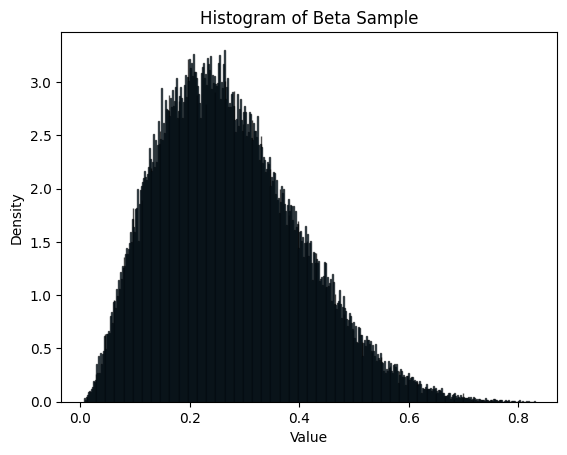

In [2]:
#visualizing the distribution 
plt.hist(sample, bins=500, density=True, alpha=0.7, edgecolor='black')
plt.title("Histogram of Beta Sample")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [ ]:
# Methods of Moment starting here

#calculating sample moment conditions 
sample_mean = np.mean(sample)
sample_var = np.var(sample, ddof = 1)

print(sample_mean, sample_var)
#now we will search over values of alpha and beta to approximate these distances

def value_function(params):
    alpha, beta = params
    np.random.seed(42)
    simulations = np.random.beta(alpha, beta, size = 10000)
    simulate_mean = np.mean(simulations)
    simulate_var = np.var(simulations, ddof = 1)
    return (simulate_mean - sample_mean)**2 + (simulate_var - sample_var)**2

alpha_output = []
beta_output = []

for i in range(100):
    result = minimize(value_function, [2,2])
    alpha_result, beta_result = result.x
    alpha_output.append(alpha_result)
    beta_output.append(beta_result)

print(beta_output)
print(np.mean(beta_output))

0.2725157469816947 0.0166069595123668


2.8967441924128483
1.0949740278879525
100


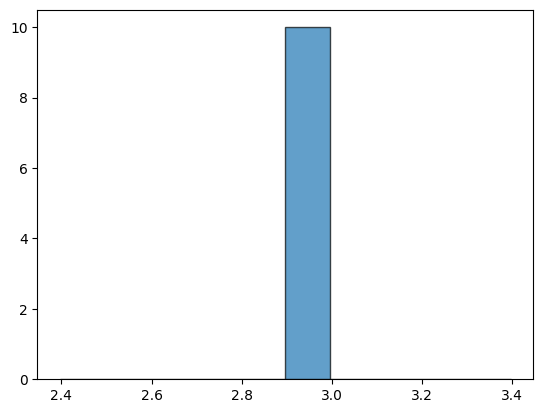

In [82]:
print(np.mean(beta_output))
print(np.mean(alpha_output))

print(beta_output)
plt.hist(beta_output, bins=10, density=True, alpha=0.7, edgecolor='black')
plt.show()